<a href="https://colab.research.google.com/github/Awrightone/Colab/blob/main/Assignment1LOGITAW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dfAW = pd.read_csv("inq2021.csv")

In [ ]:
dfAW.describe(include='all')

In [ ]:
dfAW.info()

In [ ]:
dfAW.isnull().sum()/len(dfAW)

In [ ]:
NullValue= ['avg_income','distance']
dfAW[NullValue]=dfAW[NullValue].fillna(dfAW[NullValue].mean())


In [ ]:
dummy_dataAW = pd.get_dummies(dfAW[['Instate','TERRITORY']])
dummy_dataAW.describe()

In [ ]:
num_namesAW=['CAMPUS_VISIT','REFERRAL_CNTCTS', 'SELF_INIT_CNTCTS', 'SOLICITED_CNTCTS', 'TRAVEL_INIT_CNTCTS', 'avg_income', 'distance', 'hscrat','init_span', 'int1rat', 'int2rat', 'interest', 'mailq', 'stucar','premiere'] 
dum_namesAW= ['TERRITORY_1', 'TERRITORY_2', 'TERRITORY_3', 'TERRITORY_4', 'TERRITORY_5', 'TERRITORY_6', 'TERRITORY_7', 'TERRITORY_8']

XAW= pd.concat([dfAW[num_namesAW],dummy_dataAW[dum_namesAW]], axis=1)

XAW.describe(include='all')

In [ ]:
XAW.skew(axis=0,skipna= True)

In [ ]:
XAW.hist(bins=30, figsize=(15,10))

In [ ]:
import numpy as np

In [ ]:
XAW['avg_income']=np.log10(XAW['avg_income'])

In [ ]:
XAW['distance']=np.log10(XAW['distance'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_dataAW = pd.DataFrame()
vif_dataAW["Column_Name"] = XAW.columns

vif_dataAW ["VIF"] = [variance_inflation_factor(XAW.values, i) for i in range(len(XAW.columns))]

print(vif_dataAW)

In [ ]:
XAW.corr()

In [ ]:
YAW=dfAW['Enroll']

In [ ]:
from sklearn.model_selection import train_test_split
XAW_train,XAW_val, YAW_train, YAW_val = train_test_split(XAW,YAW, test_size= 0.3, random_state=0)

In [ ]:
import statsmodels.api as sm

In [ ]:
log_reg= sm.Logit(YAW_train, XAW_train).fit()

In [ ]:
print(log_reg.summary())

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
prediction_prob= log_reg.predict(XAW_val)
predictionAW =list(map(round,prediction_prob))
confusion_matrix(YAW_val,predictionAW)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
lr_aucAW=roc_auc_score(YAW_val, prediction_prob)
print('Logistic: ROC AUC=%.3f' % (lr_aucAW))

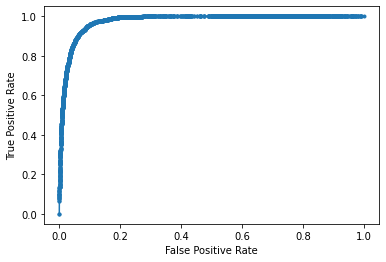

In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(YAW_val, prediction_prob)
plt.plot(lr_fpr, lr_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()